In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

%reload_ext autoreload
%autoreload 2

# Global settings for plots

# Set global figure size
plt.rcParams['figure.figsize'] = [20, 10]

# Set the global default figure facecolor to white
plt.rcParams['figure.facecolor'] = 'white'

# Set global font size
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
#mpl.rcParams['legend.fontsize'] = 'large'

# Set the default legend marker size globally
plt.rcParams['legend.markerscale'] = 2

# Increase title to plot distance
plt.rcParams['axes.titley'] = 1.05

# Set the colormap globally
plt.set_cmap('cividis')

# Set the color cycle to include 10 easily distinguishable colors
plt.style.use('tableau-colorblind10')

<Figure size 2000x1000 with 0 Axes>

In [2]:
from cmb import tester, plot 
# FIXME: remove temporary import
from cmb import functions

# CMB Workshop

### Table of Contents

1. [Introduction](#Introduction)  
    1.1 [The Cosmic Microwave Background](#The-Cosmic-Microwave-Background-(CMB)): What secrets does the universe's oldest light hold?  
    1.2 [Activity Overview](#activity-overview): How do we uncover the cosmos' earliest mysteries?  
2. [Understanding Cosmic Light](#understanding-cosmic-light)  
    2.1 [Black Body Radiation](#black-body-radiation): How do objects in space emit light?  
    2.2 [Peak Wavelength and Wien’s Law](#peak-wavelength-and-wiens-law): What does a star's color reveal?
3. [Expansion of the Universe](#expansion-of-the-universe)  
    3.1 [Redshifting and the Doppler Effect](#redshift-and-the-doppler-effect): How do we know the universe is expanding?  
    3.2 [Analyzing COBE Data Spectrum](#analyzing-cobe-data-spectrum): What can ancient light tell us?  


## Introduction

### The Cosmic Microwave Background (CMB)

### Activity Overview

## Understanding Cosmic Light

### Black Body Radiation

Black body radiation is a fundamental concept in physics that describes the spectrum of light emitted by an idealized, perfect emitter of radiation. This theoretical construct, known as a "black body," absorbs all incident electromagnetic radiation, regardless of frequency or angle, and re-emits it in a characteristic spectrum that depends only on the body's temperature. This phenomenon is critical in various fields, including astrophysics, where it helps in understanding celestial objects' thermal properties and the Cosmic Microwave Background (CMB).

The spectral radiance of a black body, which is the power emitted per unit area per unit solid angle per unit wavelength, can be quantitatively described by Planck's law. Expressed in terms of wavelength ($\lambda$) and in SI units, Planck's law is given by:

$B(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{\exp\left(\frac{hc}{\lambda kT}\right) - 1}$


with the spectral radiance $B(\lambda, T)$ given in units of $W \cdot m^{-2} \cdot sr^{-1} \cdot m^{-1}$. Here:
* $h$ is the Planck constant ($6.626 \times 10^{-34}$ J s)
* $c$ is the speed of light in a vacuum ($3.00 \times 10^8$ m/s)
* $k$ is the Boltzmann constant ($1.381 \times 10^{-23}$ J/K)
* $T$ is the absolute temperature of the black body in Kelvin (K)
* $\lambda$ is the wavelength in meters (m).

##### Optional Challenge: Write your own implementation of Planck's Law:

In [15]:
# TODO: consider adding a warm-up exercise about Python calculations: exponents, division, etc

def blackbody_radiation(wavelength, temp):
    """
    Your implementation of the black body radiation law equation using wavelength in meters.
    
    Parameters:
    - wavelength: Wavelength of the radiation (in meters).
    - temp: Temperature of the black body (in Kelvin).
    
    Returns:
    - Spectral radiance of the black body (in W/m^2/sr/nm). Return None by default as a placeholder.
    """
    # Reminder of the Planck's law formula in SI units:
    # B(lambda, T) = (2hc^2 / lambda^5) * 1 / (exp(hc / (lambda kT)) - 1)
    # where h = 6.626e-34 (J·s), c = 3e8 (m/s), k = 1.381e-23 (J/K),
    # lambda is in meters, and T is in Kelvin.

    # Hint: In Python, use '**' to denote exponentiation. For example, c squared is written as c**2.
    # NumPy's exp function (np.exp) is used for exponential calculations. For e^x, you write np.exp(x).

    h = 6.62607015e-34  # Planck constant, J·s
    c = 299792458       # Speed of light, m/s
    k = 1.380649e-23    # Boltzmann constant, J/K

    # Your implementation here.

    # Remember to return your calculated spectral radiance.

    # FIXME: remove temporary implementation
    #return functions.blackbody_radiation(wavelength, temp)

    return None

In [16]:
# Test your implementation of the Planck's Law
print(tester.test_blackbody_radiation(blackbody_radiation))

Blackbody Radiation function not implemented. Skipping tests.


#### Visualizing the Black Body Radiation

In [5]:
plot.interactive_blackbody_radiation(blackbody_radiation)

interactive(children=(FloatSlider(value=5778.0, description='Temp (K):', max=10000.0, min=1000.0, readout_form…

##### Think and Reflect:
1. What changes do you notice in the curve when the temperature is increased? 
2. How about when it is decreased?

### Peak Wavelength and Wien's Law

After exploring the black body radiation curves, you've seen how the peak of the radiation curve shifts with changes in temperature. This movement isn't random; it's described by Wien's Displacement Law. Wien's Law tells us the wavelength at which the radiation from a black body (like a star, including our Sun) is most intense, and this wavelength is inversely related to the temperature of the body.

Wien's Law can be stated mathematically as:

$\lambda_{\text{max}} = \frac{b}{T}$

where:
- $\lambda_{\text{max}}$ is the peak wavelength — the wavelength at which the emission is strongest,
- $T$ is the absolute temperature of the black body (in Kelvin),
- $b$ is Wien's displacement constant, approximately $2.897 \times 10^{-3}$ m·K (meter-Kelvin).

This law reveals an important insight: as a black body gets hotter, its peak emission shifts to shorter wavelengths. This is why, for example, a heating metal glows red and then white as its temperature increases.

#### Practical Implication

In astronomy, Wien's Law enables us to determine the surface temperature of stars by observing the color of the light they emit. A star emitting peak radiation at shorter wavelengths (more towards the blue end of the spectrum) is hotter than a star emitting peak radiation at longer wavelengths (more towards the red end of the spectrum).

#### Optional Challenge: Implementing Wien's Law

Let’s implement Wien's Law to calculate the peak wavelength for a given temperature.

In [20]:
def peak_wavelength(temp):
    """
    Your implementation of Wien's Law to calculate the peak wavelength.
    
    Parameters:
    - temp: The absolute temperature of the black body (in Kelvin).
    
    Returns:
    - The peak wavelength (in meters). Return None by default as a placeholder.
    """
    b = 2.897e-3  # Wien's displacement constant, m·K

    # Your implementation here.

    # Remember to return your calculated peak wavelength

    # FIXME: remove temporary implementation
    return functions.peak_wavelength(temp)

    #return None


In [24]:
# Test your implementation of the Wien's Law
print(tester.test_peak_wavelength(peak_wavelength))

All tests passed! Your implementation appears to be correct.


#### Visualizing the Peak Wavelength

In [26]:
plot.interactive_peak_wavelength(blackbody_radiation, peak_wavelength)

interactive(children=(FloatSlider(value=5778.0, description='Temp (K):', max=10000.0, min=1000.0, readout_form…

#### The Visible Light Spectrum

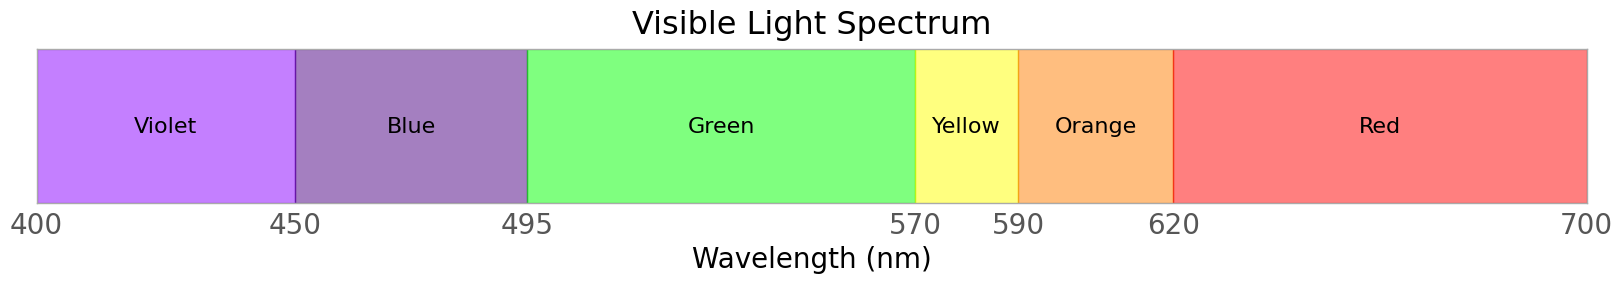

In [9]:
plot.visibile_wavelengths()

##### Think and Reflect:
1. What happens to the peak wavelength when the temperature is decreased? How might this affect the appearance of a star as it cools down?
2. Can you think of everyday examples where changes in temperature lead to changes in color similar to those described by Wien's Law?

## Expansion of the Universe

### Redshift and the Doppler Effect

In [10]:
Video("media/DopplerEffect.mp4")

### Analyzing COBE Data Spectrum

In [11]:
#−0.04, 2.26, −42.32, 284.54, −248.09
plot.interactive_cobe_polynomial_fit()

interactive(children=(FloatSlider(value=-0.05, description='a: x^4', max=0.0, min=-0.05, step=0.01), FloatSlid…

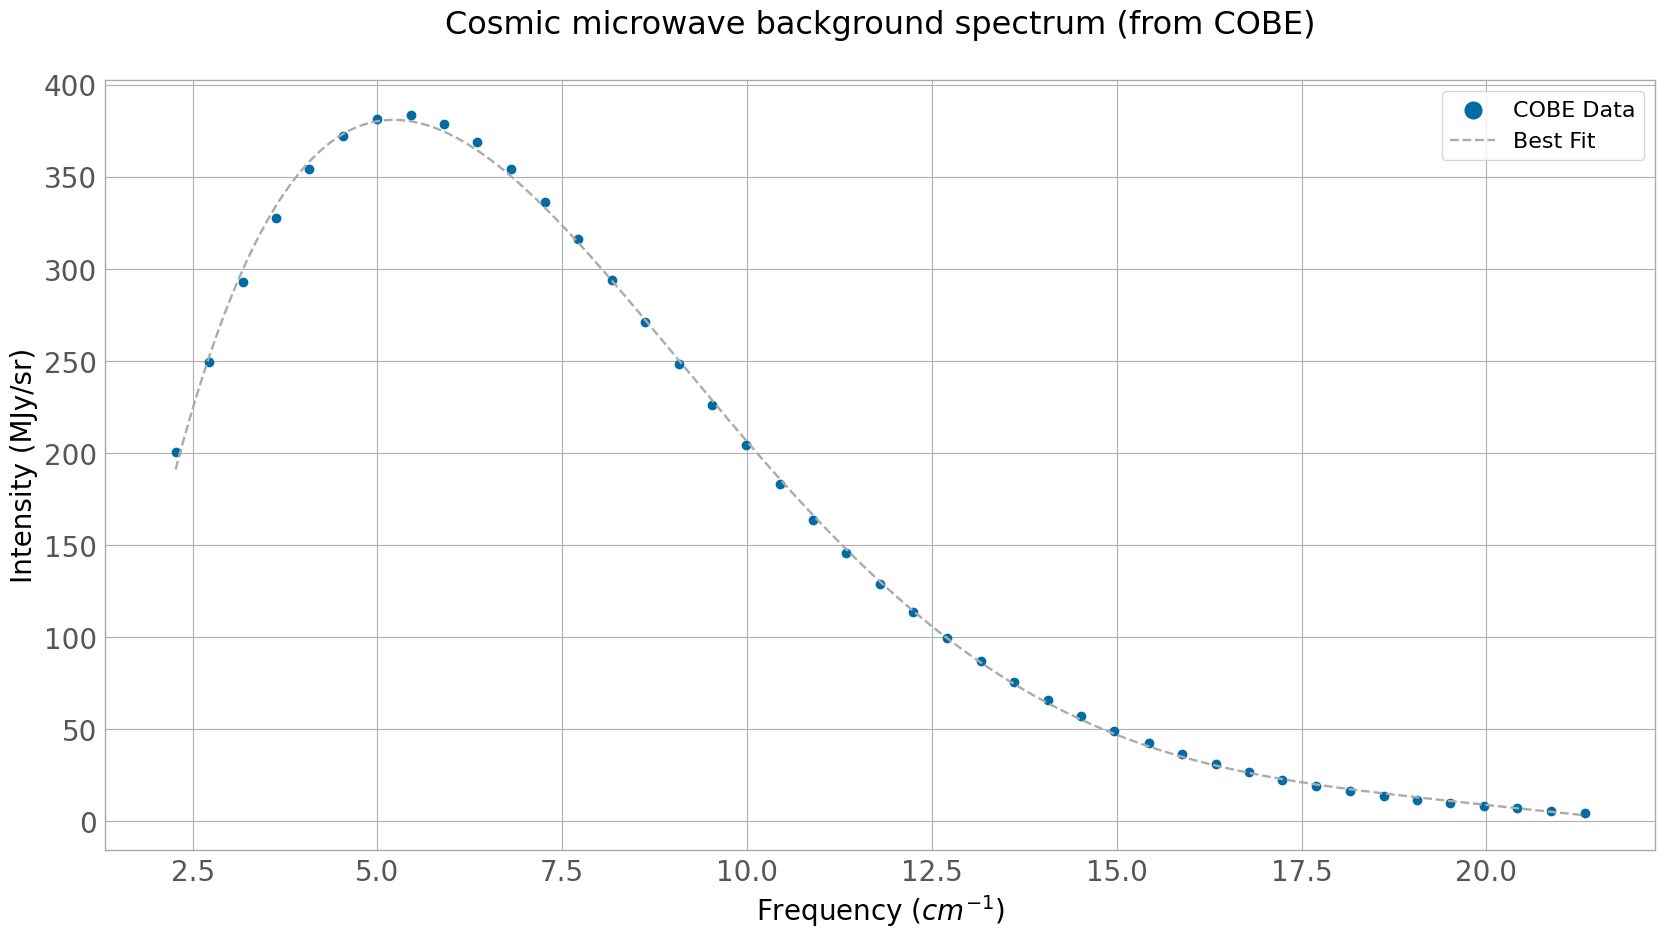

In [12]:
plot.cobe_coefficients_fit(None, True)

In [13]:
plot.interactive_polynomial_degree_selector()

interactive(children=(IntSlider(value=1, description='Polynomial Degree', max=5, min=1, style=SliderStyle(desc…

As we see above, the cosmic microwave background closely resembles a blackbody with a temperature of ~2.7 Kelvin (-270 Celsius). 

### How is it formed?

According to the Big Bang Theory:

The universe started as a hot and dense plasma consisting mainly of protons, electrons, neutrons, and photons(light). These free electrons strongly scattered photons, preventing them from traveling freely through space.

This is a similar to shining a flashlight in a dense fog, the light will shine for a short distance before it is scattered by the fog.

When the Universe expanded and cooled enough at around 3000K when the universe was approximately 379,000 years old, the free electrons and protons combined to form neutral hydrogen atoms. This is known as the peroid of Recombination. It was at this time that the Universe became transparent. In other words the fog dissapated.

The CMB is essentially the "snapshot" of the universe at the time of recombination. The CMB are the first photons emitted from the Universe during recombination that were able to travel freely.

The CMB is therefore a black-body spectrum of this afterglow!

Due to the expansion of the universe however over Billions of years, the CMB light is redshifted (streched out).

### How it was Discovered!

The existence of the CMB radiation was first predicted by Ralph Alpherin, Robert Herman, and George Gamow 1948. They reasoned that if the Big Bang had happend, the high energy background radiation would have been stretched into the microwave range of light. It was initally predicted to be ~5k.

The first measurement of the CMB was by Andrew McKellar in 1941 at measured an effective temperature of 2.3 K - at the time Mckeller did not associate his measurement with the CMB. Because of this credit is typically given to Arno Allan Penzias and Robert Woodrow Wilson for their 1964 measurements at around 3K.

Penzias, and Wilson where working at a sensitive radio telescope for Bell Labs. They stumbled upon the CMB as an unknown noise artifact noise that they could not figure out how to eliminate from their data. This unknown noise artifact was evenly spread over the sky, and was present both at day time and night. They concluded it must come from outside the galaxy, it was by fluke of circumstances that they ran into Robert H. Dicke, Jim Peebles, and David Wilkinson Cosmologists who were about to search for the CMB; after a talk they published their paper jointly to avoid conflict.


![alt](media/horn.jpg "Title")
This is the Bell Labs' horn antenna. This is the radio telescope that first measured the CMB. This photo is from April 2007. Source: https://commons.wikimedia.org/wiki/File:Bell_Labs_Horn_Antenna_Crawford_Hill_NJ.jpg



## The CMB Map

Through the last few decades we have significantly improved our ability to resolve even finer features on the map. 

![alt text](media/cmb_progress.jpg "Title")

Each panel showcases 10-square-degree patches of all-sky maps captured by space-based missions that have revolutionized our understanding of the universe. The left panel introduces NASA's Cosmic Background Explorer (COBE), launched in 1989, which played a pivotal role in supporting the big bang theory and revealing crucial information about the ancient state of our universe. In the middle panel, we encounter the Wilkinson Microwave Anisotropy Probe (WMAP), launched in 2001, which unraveled intricate variations in the primordial light, offering strong evidence for inflation and refining our understanding of the cosmos. Finally, on the right panel, we are introduced to Planck, the most advanced satellite to date, launched in 2009 with contributions from NASA and the European Space Agency.

Source: https://photojournal.jpl.nasa.gov/catalog/PIA16874

### The CMB & Inflation

The isotropic behavior of the cosmic microwave background (CMB) played a crucial role in motivating the concept of cosmic inflation.

Isotropic" refers to a property or characteristic that remains the same in all directions. In the context of the cosmic microwave background (CMB) radiation, isotropy implies that the radiation appears uniform and exhibits the same properties regardless of the direction in which it is observed. This means that the CMB radiation has a consistent temperature and intensity when measured from different points in the sky. The isotropic nature of the CMB is a fundamental observation in cosmology and provides important insights into the early universe and its evolution.

The temperature flucuations in the CMB are ~ 200 microKelvin. ($200 \times10^{-6}$k). However, At the time of recombination, the Universe was very young only hundreds of thousands of years old.

This raises an issue as there was not enough time for the Universeve to reach thermal equilibrium (unifrom temperature).

This is one of the motivations the theory of cosmic inflation. Inflation is a theory of exponential expansion of space in the early universe. The inflationary epoch is believed to have lasted from $10^{−36}$ seconds to between $10^{−33}$ and $10^{-32}$ seconds after the Big Bang. This rapid expansion would explain why the CMB is highly isotropic.

### Let's play with CMB maps

Now that we have learned the basics of CMB (Cosmic Microwave Background), it's time to dive into the exciting world of real CMB maps. These maps provide us with invaluable insights into the early universe and its properties. Let's explore this fascinating field together!

To begin our journey, we will be using CMB maps obtained from the Planck mission. The Planck mission was a space observatory dedicated to studying the CMB and its various characteristics. Launched by the European Space Agency (ESA) in 2009, Planck operated until 2013, collecting an enormous amount of data that revolutionized our understanding of the universe's origins.

![planck_cmb](media/planck_cmb.png)

#### Loading Measurements from Planck

To work with the measurements obtained from the Planck mission, we need to utilize some special software tools that are specifically designed to handle and analyze CMB data. These software packages are crucial for accessing and interpreting the wealth of information contained within Planck's measurements.

In order to work with measurements from the Planck mission, we often need to utilize these specific software tools that are tailored for handling CMB data. However, navigating through these tools involves dealing with a lot of technicalities and intricacies, which may not be particularly interesting for everyone. To make things easier for you, we have provided some functions for you that simplify the process.

To get started, we have already downloaded some Planck maps for you. Now, let's proceed to load these maps using the load_cmb_map function provided by the cmb library. This function effortlessly import the Planck maps into our notebook environment. We will then use view_map function to visualize it.


In [14]:
# load a map that we have pre-downloaded for you
from cmb import cmb_utils
cmb_map = cmb_utils.load_cmb_map("data/COM_CMB_IQU-commander_1024_R2.02_dg16_car.fits")

# use a provided function to view the cmb map
cmb_utils.view_map(cmb_map)

ModuleNotFoundError: No module named 'pixell'



When we visualize a three-dimensional object like a sphere on a two-dimensional surface, such as an image, a distortion effect occurs at the top and bottom portions of the image.

This distortion arises due to the challenge of representing a curved surface onto a flat plane.

One most interesting aspect of the CMB map is the fluctuation we see across the entire sky. Although they may seem random, they are of profound importance as they provide valuable insights into the early universe.

To begin our analysis, let's get a sense of how much the CMB temperature is fluctuating on the sky by computing the standard deviation of the CMB map. This statistical measure will quantify the magnitude of temperature fluctuations present in the map.

Exercise: compute standard deviation of the CMB map

hint: use the np.std function: see documentation here: https://numpy.org/doc/stable/reference/generated/numpy.std.html


exercise: compute the standard deviation of the map

 The number you got is in unit of Kelvin. How small is the fluctuations you got? How many times is it smaller than the average temperature of the CMB (take 2.7 K for the CMB temperature)? 

exercise: how does it compare with the mean CMB temperature?

the CMB map is remarkably uniform, with fluctuations roughly hundred-thousand times smaller than the mean! It is a remarkable achievement that we can even measure this tiny fluctuations.

Why are these temperature fluctuations interesting? They represent minute density variations that existed in the early universe, which is the seed of all the structure of our present universe that we see today.

## What's on the map

To enhance our understanding and visual exploration of the CMB map, we will utilize an interactive tool available at this website: https://phy-act1.princeton.edu/public/snaess/actpol/dr5/atlas/.

**Exercise: see if you can identify different types of objects in the map**

Overall, we can observe several types of features within the CMB map.

1. Hot Spots/Cold Spots:
First we notice the regions of both hot and cold spots. These temperature variations arise from the density fluctuations in the early universe. These fluctuations are remnants of the quantum fluctuations during the cosmic inflation era, which have evolved over billions of years into the structures we see today.

2. Stars:
While observing the CMB map, we may come across small point-like features that resemble stars. In fact, many of them are stars in our galaxy and they become visible by blocking the CMB light.

3. Galaxies:
The CMB map also contains signals from distant galaxies. These signals are typically observed as extended patches or structures embedded within the CMB map.

4. Galaxy Clusters:
Another fascinating feature that can be observed in the CMB map is galaxy clusters which are a huge assembly of galaxies and dark matter pulled together by gravitational force. They manifest as distinctive cold dot-like spots in the CMB map. This intriguing characteristic arises due to an effect known as Sunyaev-Zel'dovich effect. As the CMB radiation passes through the hot gas present within galaxy clusters, it gets a energetic kick which shifts the CMB radiations to a slightly different frequency, and consequently, these photons are "missing" from the CMB map, appearing as cold spots.

5. Milky Way Galaxy:
In the CMB map, we may also notice a large, prominent feature that corresponds to our own Milky Way galaxy. The Milky Way emits various forms of radiation that can contaminate the CMB signal. It appears as a distinctive pattern, sometimes referred to as the "Galactic Plane," spanning across the CMB map. Care must be taken to account for and mitigate the Milky Way's contributions when studying the cosmic microwave background.

The formation of cold and hot spots in the cosmic microwave background (CMB) map can be attributed to the interplay between radiation pressure and gravity during the early universe. Slight density variations caused variations in radiation pressure, leading to sound waves propagating through the gas. At around 400,000 years after the Big Bang, the interaction between matter and radiation significantly reduces, resulting in the pressure wave being nearly frozen, with a size of approximately 150 megaparsecs.


### Estimate the distance of the moon

To estimate the age of the universe using the CMB map, we can employ a methodology similar to determining the distance of the moon. Let's walk through how to do that now.

Let's suppose that we already know the physical size (diameter) of the moon to be 3,474 km, and we can easily measure the angular size (diameter) of the moon on the sky to be 0.52 deg. How do we estimate the distance of moon to us? Recall the formula for an arc-length

![arclengh](media/arclength.png)

Therefore, we have
$$\text{distance to the moon} = \frac{\text{physical diameter of the moon}}{\text{angular size subtended by the moon}}$$

**Exercise**: work out the distance to the moon, and how long does it take light to reach the moon from the Earth?

In the context of the CMB, the hot and cold spots are a result of primordial "sound" waves generated by the interplay of gravity and radiation pressure. At approximately 300,000 years after the Big Bang, the CMB light becomes independent from the other primordial components of the universe. During this relatively brief period, the primordial "sound" waves have only 300,000 years to propagate, leading to the formation of a pattern with a consistent physical size, determined by the sound speed. This physical size constraint is referred to as the "sound horizon" and is calculated to be approximately 150 Mpc.

Having established the sound horizon's physical size, our next step is to measure the apparent size of each hot spot in the CMB maps. By doing so, we can then estimate the distance the CMB light has traversed to reach us. With the known speed of light, we can calculate the time it took for the light to reach us, providing a close approximation of the age of the universe.

Let's do it now!

**Exercise: find hot spots coordinates**

- Use the visualizer to identify at least 20 CMB hot spots: recall what we discussed earlier about what is on the CMB, try to avoid the galaxy, stars, etc.
- Record down the coordinates of each hot spots in the list below

In [ ]:
coords = np.array([
    [-46.266, -25.65],
    [-40.525, -21.99],
    # similarly fill up more hot spots you identified below!

])

In [ ]:
thumbnails = cmb_utils.extract_thumbnails(cmb_map, coords)
cmb_utils.plot_thumbnails(thumbnails, figsize=(10,6))

If you are doing a good job at finding hot spots, you should find the maximum roughly at the center of each image, if it doesn't look very good, you can reiterate your hot spots selection or measurements.

As you can see, each of the snapshot look random, but we can average all these snapshots to get a better view less affected by noise in each snapshot.

**Exercise: average the thumbnails together to obtain a mean estimate**

hint: use `np.mean` function, and pay attention to the `axis` parameter.

In [ ]:
# find mean thumbnail
mean_img = # fill up your code

# now we can visualize your mean thumbnail using a library that has been provided
cmb_utils.view_map(mean_img)



Here you see a much better image with a clear characteristic size!

We know the rough physical size of the hot spot to be around 150 Mpc, now we will measure the angular size of the hot spot, with which we can then work out the distance that the CMB photons have traveled.

Now we have a image to work with, see if you could give a rough estimate on how large the average hot spot is?

**Exercise**: give a rough estimate of the angular size of the hot spot

hint: try taking a slice of your mean_img.


In [ ]:
# your code goes here

Now let's try to do it more precisely using a function that we have provided, the extract_profile. It will try to take an average profile among all directions. This function returns a radius and a profile.

In [ ]:
radius, profile = cmb_utils.extract_profile(mean_img)


**exercise**: plot profile

In [ ]:
# exercise
plt.plot(<<< radius >>>, <<< profile >>>, color = <<< colour>>>) # add code in parenthesis
plt.xlabel("r [deg]")  # add axis labels
plt.ylabel("T [\$mu$K]")

**Exercise: As a rough approximation, let's measure the size of the hot spot as the radius at which the hot spot's maximum value drops to around 30% of its value.**

hint: A trivial way to measure this is to see when the difference between the profile and 30% of its maximum (`np.max`) goes from positive to negative. A more advanced way to measure is through `np.where` function: https://numpy.org/doc/stable/reference/generated/numpy.where.html. 

In [ ]:
# find the radias when the profile drops to 30% of its maximum
# your code goes here

Now we have measured the approximate angular radius of the CMB hot spot on the sky, and we know from physics that they correspond to a physical size of around 150 megaparsecs (Mpc). Let's repeat what we did for the Moon here to find out the distance that CMB light has traveled from its source to us.

**Exercise: find the distance that CMB light has traveled to reach us following the moon example**

hint: be sure to convert degree to radius first (see for example `np.deg2rad` function)

In [ ]:
# your code goes here

theta = 0.605  # student fill-in
physical_size = 150 # Mpc
distance = physical_size / (theta / 180 * np.pi)
print(f"Distance that CMB light has traveled: {distance} Mpc")

Now we know the distance, 

**Exercise: how long does it take for light to traverse this distance?**

Let's use the fact that light travels at a speed of $3.06\times 10^{-7}$ Mpc / yr.

In [ ]:
# your code goes here
# 
v = 3.06e-7
time_traveled = (distance / v) / 1e9  # in billion years
print(f"Time traveled by CMB light if it travels at speed of light: {time_traveled} Gyr")

Compare the answer to what you have obtained in global cluster notebook, how close they are and what do you think about the result?

![expanding_sphere](media/expanding_sphere.png)

  - Neglected to consider the expansion of universe: we have assumed the universe didn't expand
  - When the universe is much smaller, the distance traveled by light relative to the distance between two objects are much larger in a fixed period
    - use a balloon as an example, if an ant is climbing on a balloon at a fixed speed, if the balloon is very small, the ant can quickly travel from pole to pole, but if the balloon is inflated, it will take the ant much longer.
    - therefore, it's important to take account of the expansion rate of the universe when calculating the time it takes for CMB light to traverse a given distance.
- Calculate it accurately requires calculus as the expansion rate is constantly changing and the universe is composed of different components that behave differently when the universe expands, to avoid the complexity we provide an interactive tool below:

use billion year

In [ ]:
cmb_utils.measure_distance()